# Globeloc

The core functionality to create the data structure for the global spatial array.

There are four parts

1. The creation of data in the array format
2. The storage of data in a flat file format
3. The loading and access to the data as per pandas api
4. A cloud hosted data store where uses can push, pull, add data

The specification for this product is layed out in the product description document

In [2]:
import fiona
import pandas as pd
import geopandas as gpd

In [3]:
f_df = gpd.read_file("./gis_osm_pois_free_1.shp")

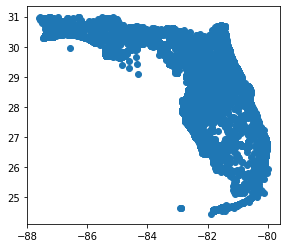

In [4]:
f_df.plot()

In [5]:
f_df.describe()

,code
count,47385.000000
mean,2480.199304
std,306.285068
min,2001.000000
25%,2301.000000
50%,2424.000000
75%,2741.000000
max,2964.000000


OK so we have 72K locations of interest... But what we want is to able to search the data. Traditionally we would need to define a polygon boundary and then write a intersection query. If we want this to be fast it means we have to make a quadtree. Or use a database.

But what if we could just index into the world and pick the data we wanted?

Or we could just multiply arrays. The boundary we want x the base data set.

# Create the raw data

In [6]:
import numpy as np

We need to know the size of our array.

Number of files, rows, cols.

In [45]:
num_deci_places = 10000 # https://gis.stackexchange.com/questions/8650/measuring-accuracy-of-latitude-and-longitude
n_cols = len(set(f_df.fclass))
col_keys = [k for k in set(f_df.fclass)]
n_rows = 180 * num_deci_places
n_files = None
col_keys

['clothes',
 'water_well',
 'wastewater_plant',
 'bicycle_rental',
 'courthouse',
 'water_works',
 'cinema',
 'hunting_stand',
 'cafe',
 'toy_shop',
 'water_tower',
 'viewpoint',
 'stationery',
 'ruins',
 'camp_site',
 'pharmacy',
 'university',
 'graveyard',
 'castle',
 'pub',
 'supermarket',
 'sports_shop',
 'florist',
 'kindergarten',
 'post_box',
 'drinking_water',
 'vending_parking',
 'public_building',
 'fountain',
 'bakery',
 'car_wash',
 'laundry',
 'food_court',
 'library',
 'camera_surveillance',
 'restaurant',
 'doityourself',
 'beverages',
 'windmill',
 'pitch',
 'memorial',
 'convenience',
 'mobile_phone_shop',
 'monument',
 'comms_tower',
 'lighthouse',
 'park',
 'shelter',
 'hospital',
 'dentist',
 'waste_basket',
 'mall',
 'recycling_clothes',
 'travel_agent',
 'telephone',
 'nursing_home',
 'butcher',
 'jeweller',
 'post_office',
 'fort',
 'town_hall',
 'college',
 'theatre',
 'track',
 'sports_centre',
 'car_sharing',
 'outdoor_shop',
 'police',
 'prison',
 'archaeolo

In [8]:
coords = f_df.geometry
x = coords.apply(lambda p: p.x) # Lon
y = coords.apply(lambda p: p.y) # Lat

In [17]:
t_x = x.apply(lambda p: round((p + 180) * num_deci_places), 0)
t_y = y.apply(lambda p: round((p + 90) * num_deci_places), 0)

In [28]:
n_files = t_y.max() - t_y.min()
n_files

65461

In [43]:
for j in range(t_y.min(), t_y.max() + 1):
    array = np.zeros([n_rows, n_cols])
    hits = f_df[t_y == j]
    print(len(hits))
    #numpy.savetxt(f"./data/{j}.csv", array, delimiter=",")
            

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [40]:
f_df

,osm_id,code,fclass,name,geometry
0,26926225,2401,hotel,Florida Hotel,POINT (-81.39555 28.44504)
1,95855262,2422,camp_site,None,POINT (-85.90703 30.23211)
2,96919971,2724,memorial,None,POINT (-81.66089 30.32608)
3,97557631,2701,tourist_info,Mile 1,POINT (-85.41047 29.80190)
4,97571939,2007,library,Hardee Correctional Institution Library,POINT (-82.01485 27.59041)
...,...,...,...,...,...
47380,7221137080,2301,restaurant,TamPiz,POINT (-82.46404 27.94505)
47381,7221137081,2301,restaurant,The Asian Kitchen,POINT (-82.46404 27.94494)
47382,7221137082,2529,beauty_shop,Kendra & Co,POINT (-82.46428 27.94473)
47383,7221150318,2307,biergarten,Fermented Reality Biergarten,POINT (-82.44700 27.94291)
